<a href="https://colab.research.google.com/github/abishekabi/amber-detector/blob/main/car_make_model_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py 

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import torch
print('pytorch version: ',torch.__version__)
import torch.utils.data as data
import fastai
print('fastai version: ',fastai.__version__)
import torchvision.models
import warnings
warnings.filterwarnings('ignore')

from pylab import *

import numpy as np
import time
from pathlib import Path

pytorch version:  1.7.0+cu101
fastai version:  1.0.61


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [ ]:
# !unzip data.zip

In [4]:
!ls car_data/car_data

prediction  test  train


In [5]:
!ls

anno_test.csv	Car-Models-Classifier	     names.csv
anno_train.csv	car_models_classifier.ipynb  StanfordNeuralNetwork
car_data	data.zip


pytorch version:  1.7.0+cu101
fastai version:  1.0.61


In [44]:
img_dir = 'car_data'
path = Path(img_dir)
path.ls()

[PosixPath('car_data/car_data'),
 PosixPath('car_data/export.pkl'),
 PosixPath('car_data/first_model.pkl')]

In [45]:
data = ImageDataBunch.from_folder(f'{path}',valid_pct = 0.2,size = 224,bs = 64).normalize(imagenet_stats)

In [46]:
for classes, numbers in enumerate(data.classes[:15]):
    print(classes,':',numbers)
len(data.classes),data.c

0 : AM General Hummer SUV 2000
1 : Acura Integra Type R 2001
2 : Acura RL Sedan 2012
3 : Acura TL Sedan 2012
4 : Acura TL Type-S 2008
5 : Acura TSX Sedan 2012
6 : Acura ZDX Hatchback 2012
7 : Aston Martin V8 Vantage Convertible 2012
8 : Aston Martin V8 Vantage Coupe 2012
9 : Aston Martin Virage Convertible 2012
10 : Aston Martin Virage Coupe 2012
11 : Audi 100 Sedan 1994
12 : Audi 100 Wagon 1994
13 : Audi A5 Coupe 2012
14 : Audi R8 Coupe 2012


(197, 197)

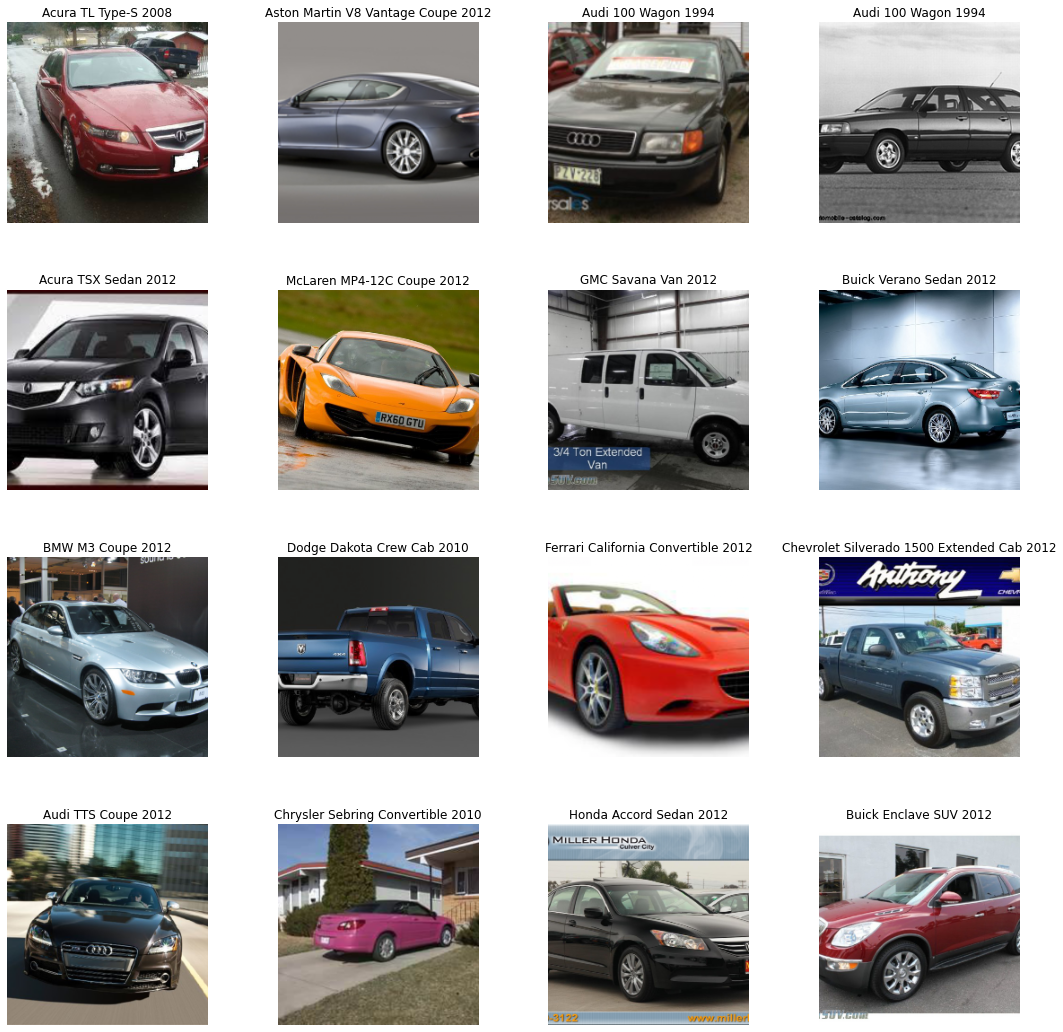

In [47]:
data.show_batch(rows = 4,figsize = (15,15))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir="/tmp/model/")


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,4.533213,3.106189,0.703120,06:12
1,2.796084,2.055481,0.527340,06:01
2,1.855421,1.583637,0.411492,06:01
3,1.150519,1.350277,0.358048,06:01
4,0.693777,1.250774,0.325301,05:58
5,0.447322,1.222999,0.323448,05:55


In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('cycle-1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.963067,1.523297,0.405314,06:03
1,1.556359,1.594518,0.420760,05:59
2,0.900126,1.034878,0.289157,05:51
3,0.379956,0.733207,0.201112,05:53
4,0.116636,0.518907,0.141798,05:59
5,0.045332,0.501406,0.137164,06:06


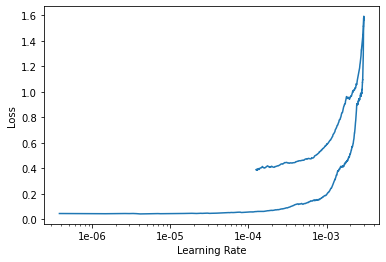

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('cycle-2',return_path=True)

PosixPath('/tmp/model/cycle-2.pth')

In [ ]:
learn.export('./export.pkl')

In [ ]:
!ls -la car_data/

total 201670
drwx------ 4 root root      4096 Dec 16 02:36 car_data
-rw------- 1 root root 103252712 Dec 16 04:02 export.pkl
-rw------- 1 root root 103252615 Dec 16 05:26 first_model.pkl


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

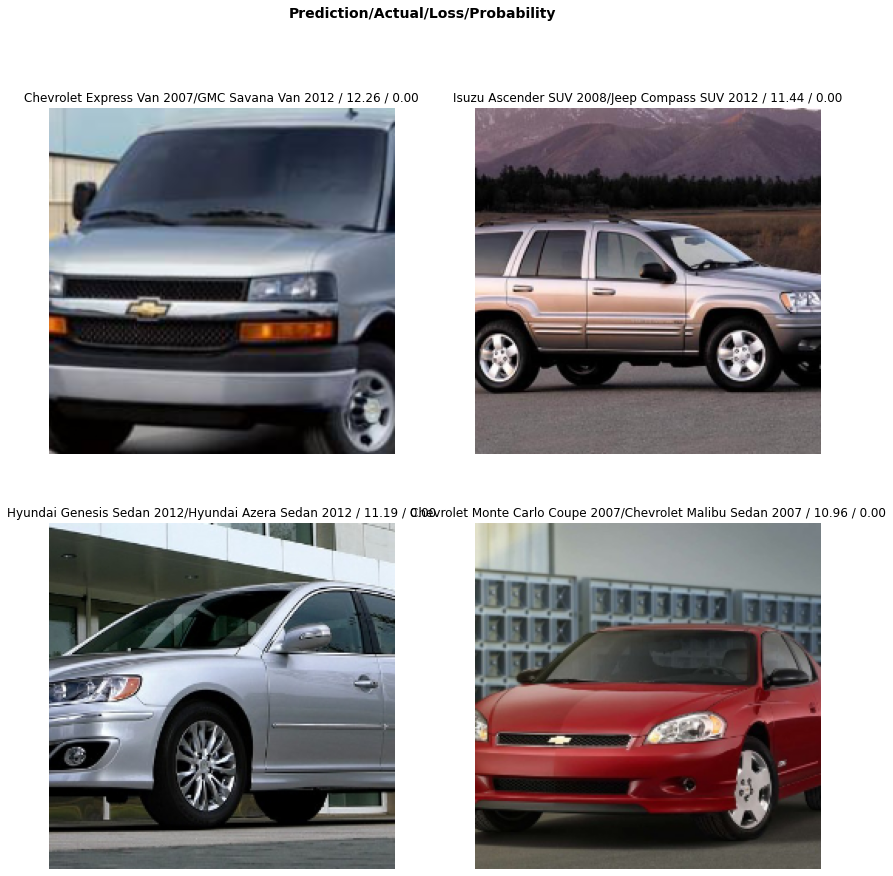

In [ ]:
interp.plot_top_losses(4, figsize=(14,14),heatmap=False)

In [ ]:
interp.most_confused(min_val=2)

[('Audi TTS Coupe 2012', 'Audi TT Hatchback 2011', 7),
 ('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  6),
 ('Aston Martin V8 Vantage Convertible 2012',
  'Aston Martin Virage Convertible 2012',
  5),
 ('Audi S5 Coupe 2012', 'Audi A5 Coupe 2012', 5),
 ('Bugatti Veyron 16.4 Convertible 2009', 'Bugatti Veyron 16.4 Coupe 2009', 5),
 ('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 4),
 ('BMW 6 Series Convertible 2007', 'BMW M6 Convertible 2010', 4),
 ('Bentley Continental GT Coupe 2007', 'Bentley Continental GT Coupe 2012', 4),
 ('Bugatti Veyron 16.4 Coupe 2009', 'Bugatti Veyron 16.4 Convertible 2009', 4),
 ('Chevrolet Corvette Convertible 2012', 'Chevrolet Corvette ZR1 2012', 4),
 ('Chevrolet Express Cargo Van 2007', 'Chevrolet Express Van 2007', 4),
 ('Chevrolet Express Van 2007', 'Chevrolet Express Cargo Van 2007', 4),
 ('Chevrolet Silverado 2500HD Regular Cab 2012',
  'Chevrolet Silverado 1500 Regular Cab 2012',
  4),
 ('Acura RL Sedan

In [ ]:
input, target = learn.get_preds()

In [ ]:
print (top_k_accuracy(input=input, targs=target,k=1))

tensor(0.8628)


In [ ]:
print (top_k_accuracy(input=input, targs=target,k=3))

tensor(0.9608)


# Predict

In [6]:
def find_classes(dir):
    classes = os.listdir(dir)
    return classes
classes = find_classes("car_data/car_data/train")

print(classes[:5])

['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008']


In [41]:
!head StanfordNeuralNetwork/car_labels.csv

﻿filename,bbox_x1,bbox_y1,bbox_x2,bbox_y2,label_num,test,label
000001.jpg,112,7,853,717,1,FALSE,﻿'AM General Hummer SUV 2000'
000002.jpg,48,24,441,202,1,FALSE,﻿'AM General Hummer SUV 2000'
000003.jpg,7,4,277,180,1,FALSE,﻿'AM General Hummer SUV 2000'
000004.jpg,33,50,197,150,1,FALSE,﻿'AM General Hummer SUV 2000'
000005.jpg,5,8,83,58,1,FALSE,﻿'AM General Hummer SUV 2000'
000006.jpg,10,6,250,110,1,FALSE,﻿'AM General Hummer SUV 2000'
000007.jpg,56,1,394,176,1,FALSE,﻿'AM General Hummer SUV 2000'
000008.jpg,1,13,113,83,1,FALSE,﻿'AM General Hummer SUV 2000'
000009.jpg,15,111,271,272,1,FALSE,﻿'AM General Hummer SUV 2000'


In [42]:
!cat StanfordNeuralNetwork/car_labels.csv|grep 002620.jpg

002620.jpg,31,89,296,187,33,FALSE,'BMW X6 SUV 2012'


In [20]:
model_path = "car_data"
image_path = "car_data/car_data/prediction"
pred_img_file = "StanfordNeuralNetwork/car_ims/002620.jpg"

In [8]:
M = load_learner(path=model_path, file='first_model.pkl')

In [21]:
im_pred=open_image(pred_img_file)

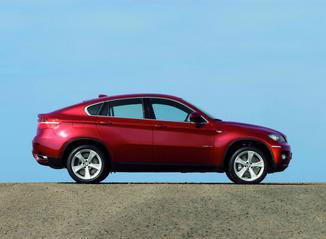

In [22]:
im_pred

In [12]:
pred = M.predict(im_pred)

### Predicted Car model

In [13]:
print(classes[pred[1].cpu().numpy()])

BMW X6 SUV 2012


## Car color

In [14]:
!pip install --quiet colorthief
!pip install --quiet webcolors==1.3

In [25]:
import webcolors
from colorthief import ColorThief

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        color_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        color_name = closest_colour(requested_colour)
    return color_name

# requested_colour = (215, 201, 145)
# actual_name, closest_name = get_colour_name(requested_colour)

# print("Actual colour :", actual_name, ", closest colour :", closest_name)

# def detect_car_color(im): #, x, y, w, h):
#   # crop image
#   cropped_img = np.array(im, dtype=np.uint8)#[y:y+h, x:x+w]
#   imageio.imwrite('cropped_img.jpg', cropped_img)
  
#   # color theif library can only read the image from file, so not passing numpy array
#   color_thief = ColorThief('./cropped_img.jpg')      
#   color_thief = ColorThief('./cropped_img.jpg')
#   # get the dominant color
#   dominant_color = color_thief.get_color(quality=1)
#   palette = color_thief.get_palette(color_count=6)

#   color_name = get_colour_name(palette[1])

#   return color_name

In [38]:
color_thief = ColorThief(pred_img_file)
dominant_color = color_thief.get_color(quality=1)
palette = color_thief.get_palette(color_count=6)

color_name = get_colour_name(palette[0])
print("CAR COLOR: ", color_name) #, x,y,w,h))

CAR COLOR:  skyblue
